In [ ]:
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
import os
os.remove('players.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'players.csv'

In [ ]:
# Uploading the dataset containing attributes about players
from google.colab import files
uploaded = files.upload()

Saving players.csv to players.csv


In [ ]:
# Reading the dataset containing attributes about players
players= pd.read_csv(io.StringIO(uploaded['players.csv'].decode('utf-8')))
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [ ]:
# Finding out what the column names are
print(players.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur'],
      dtype='object')


In [ ]:
# Calculating and converting date of birth into age for further analysis
import pandas as pd
from datetime import datetime

# Assuming 'date_of_birth' is the column containing the date of birth in your DataFrame
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])  # Convert to datetime if it's not already

# Function to calculate age
def calculate_age(date_of_birth):
    current_date = datetime.now()
    age = current_date.year - date_of_birth.year - ((current_date.month, current_date.day) < (date_of_birth.month, date_of_birth.day))
    return age

# Apply the function to each row
players['age'] = players['date_of_birth'].apply(calculate_age)

# Display the DataFrame with the 'age' column added
print(players.head())


   player_id first_name     last_name                name  last_season  \
0         10   Miroslav         Klose      Miroslav Klose         2015   
1         26      Roman  Weidenfeller  Roman Weidenfeller         2017   
2         65    Dimitar      Berbatov    Dimitar Berbatov         2015   
3         77        NaN         Lúcio               Lúcio         2012   
4         80        Tom        Starke          Tom Starke         2017   

   current_club_id         player_code    country_of_birth city_of_birth  \
0              398      miroslav-klose              Poland         Opole   
1               16  roman-weidenfeller             Germany          Diez   
2             1091    dimitar-berbatov            Bulgaria   Blagoevgrad   
3              506               lucio              Brazil      Brasília   
4               27          tom-starke  East Germany (GDR)       Freital   

  country_of_citizenship  ... height_in_cm contract_expiration_date  \
0                Germany  .

In [ ]:
# Checking if the new column age has been added
print(players.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur',
       'highest_market_value_in_eur', 'age'],
      dtype='object')


In [ ]:
import os
os.remove('player_valuations.csv')

In [ ]:
# Uploading the dataset containing valuations about players
from google.colab import files
uploaded = files.upload()

Saving player_valuations.csv to player_valuations.csv


In [ ]:
# Reading the CSV dataset
player_valuation = pd.read_csv(io.StringIO(uploaded['player_valuations.csv'].decode('utf-8')))
player_valuation.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [ ]:
# Checking the names of columns in the player valuation dataset
print(player_valuation.columns)

Index(['player_id', 'date', 'market_value_in_eur', 'current_club_id',
       'player_club_domestic_competition_id'],
      dtype='object')


In [ ]:
# Merging the datasets on 'player_id'
players_merged = pd.merge(players, player_valuation, on='player_id', how='inner')

In [ ]:
# Displaying the merged dataset
players_merged

,player_id,first_name,last_name,name,last_season,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur_x,highest_market_value_in_eur,age,date,market_value_in_eur_y,current_club_id_y,player_club_domestic_competition_id
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,45.0,2004-10-04,7000000,398,IT1
1,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,45.0,2005-01-07,9000000,398,IT1
2,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,45.0,2005-05-05,12000000,398,IT1
3,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,45.0,2005-09-30,15000000,398,IT1
4,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,45.0,2006-01-09,20000000,398,IT1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467156,1201294,Ozan,Demirbağ,Ozan Demirbağ,2023,3840,ozan-demirbag,Türkiye,Tokat,Türkiye,...,https://www.transfermarkt.co.uk/ozan-demirbag/...,TR1,Adana Demirspor Kulübü,75000.0,75000.0,16.0,2024-03-15,75000,3840,TR1
467157,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,6890,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,50000.0,17.0,2024-03-15,50000,6890,TR1
467158,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,2410,sid-ahmed-aissaoui,Algeria,Blida,Algeria,...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,PFK CSKA Moskva,150000.0,150000.0,19.0,2024-02-02,150000,2410,RU1
467159,1225269,Erdem,Çalık,Erdem Çalık,2023,3209,erdem-calik,Türkiye,Istanbul,Türkiye,...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,Pendikspor,50000.0,50000.0,17.0,2024-01-28,50000,3209,TR1


In [ ]:
print(players_merged.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id_x', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'current_club_name', 'market_value_in_eur_x',
       'highest_market_value_in_eur', 'age', 'date', 'market_value_in_eur_y',
       'current_club_id_y', 'player_club_domestic_competition_id'],
      dtype='object')


In [ ]:
# Check if all values in 'current_club_name' are the same as 'current_club_id_x'
same_name_x = (players_merged['current_club_name'] == players_merged['current_club_id_x']).all()

# Check if all values in 'current_club_name' are the same as 'current_club_id_y'
same_name_y = (players_merged['current_club_name'] == players_merged['current_club_id_y']).all()

# Check if all values in 'current_club_id_x' are the same as 'current_club_id_y'
same_x_y = (players_merged['current_club_id_x'] == players_merged['current_club_id_y']).all()

if same_name_x and same_name_y and same_x_y:
    print("All values in 'current_club_name', 'current_club_id_x', and 'current_club_id_y' are the same.")
else:
    print("Values in 'current_club_name', 'current_club_id_x', and 'current_club_id_y' are not consistent.")


Values in 'current_club_name', 'current_club_id_x', and 'current_club_id_y' are not consistent.


In [ ]:
# Find rows where 'current_club_name' differs from 'current_club_id_x' or 'current_club_id_y'
inconsistent_rows_name_x = players_merged[players_merged['current_club_name'] != players_merged['current_club_id_x']]
inconsistent_rows_name_y = players_merged[players_merged['current_club_name'] != players_merged['current_club_id_y']]

# Print sample rows for investigation
print("Sample rows where 'current_club_name' differs from 'current_club_id_x':")
print(inconsistent_rows_name_x.head())

print("\nSample rows where 'current_club_name' differs from 'current_club_id_y':")
print(inconsistent_rows_name_y.head())


Sample rows where 'current_club_name' differs from 'current_club_id_x':
   player_id first_name last_name            name  last_season  \
0         10   Miroslav     Klose  Miroslav Klose         2015   
1         10   Miroslav     Klose  Miroslav Klose         2015   
2         10   Miroslav     Klose  Miroslav Klose         2015   
3         10   Miroslav     Klose  Miroslav Klose         2015   
4         10   Miroslav     Klose  Miroslav Klose         2015   

   current_club_id_x     player_code country_of_birth city_of_birth  \
0                398  miroslav-klose           Poland         Opole   
1                398  miroslav-klose           Poland         Opole   
2                398  miroslav-klose           Poland         Opole   
3                398  miroslav-klose           Poland         Opole   
4                398  miroslav-klose           Poland         Opole   

  country_of_citizenship  ...  \
0                Germany  ...   
1                Germany  ...   
2    

In [ ]:
# Merging 'current_club_name', 'current_club_id_x', and 'current_club_id_y' into a single column 'current_club'
players_merged['current_club'] = players_merged['current_club_name']

# Dropping the redundant columns
players_merged.drop(['current_club_id_x', 'current_club_id_y', 'current_club_name'], axis=1, inplace=True)


In [ ]:
print(players_merged.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'market_value_in_eur_x', 'highest_market_value_in_eur', 'age', 'date',
       'market_value_in_eur_y', 'player_club_domestic_competition_id',
       'current_club'],
      dtype='object')


In [ ]:
# Check if all values in 'market_value_in_eur_x' are the same as 'market_value_in_eur_y'
same_values = (players_merged['market_value_in_eur_x'] == players_merged['market_value_in_eur_y']).all()

if same_values:
    print("All values in 'market_value_in_eur_x' and 'market_value_in_eur_y' are the same.")
else:
    print("Values in 'market_value_in_eur_x' and 'market_value_in_eur_y' are not consistent.")


Values in 'market_value_in_eur_x' and 'market_value_in_eur_y' are not consistent.


In [ ]:
# Find rows where 'market_value_in_eur_x' differs from 'market_value_in_eur_y'
inconsistent_rows = players_merged[players_merged['market_value_in_eur_x'] != players_merged['market_value_in_eur_y']]

# Print sample rows for investigation
print("Sample rows where 'market_value_in_eur_x' differs from 'market_value_in_eur_y':")
print(inconsistent_rows.head())


Sample rows where 'market_value_in_eur_x' differs from 'market_value_in_eur_y':
   player_id first_name last_name            name  last_season  \
0         10   Miroslav     Klose  Miroslav Klose         2015   
1         10   Miroslav     Klose  Miroslav Klose         2015   
2         10   Miroslav     Klose  Miroslav Klose         2015   
3         10   Miroslav     Klose  Miroslav Klose         2015   
4         10   Miroslav     Klose  Miroslav Klose         2015   

      player_code country_of_birth city_of_birth country_of_citizenship  \
0  miroslav-klose           Poland         Opole                Germany   
1  miroslav-klose           Poland         Opole                Germany   
2  miroslav-klose           Poland         Opole                Germany   
3  miroslav-klose           Poland         Opole                Germany   
4  miroslav-klose           Poland         Opole                Germany   

  date_of_birth  ...                                          image_url 

In [ ]:
# Calculate the average market value
players_merged['average_market_value'] = (players_merged['market_value_in_eur_x'] + players_merged['market_value_in_eur_y']) / 2

# Drop the redundant columns
players_merged.drop(['market_value_in_eur_x', 'market_value_in_eur_y'], axis=1, inplace=True)

# Rename the new column to 'market_value_in_eur'
players_merged.rename(columns={'average_market_value': 'market_value_in_eur'}, inplace=True)


In [ ]:
print(players_merged.columns)

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'contract_expiration_date', 'agent_name',
       'image_url', 'url', 'current_club_domestic_competition_id',
       'highest_market_value_in_eur', 'age', 'date',
       'player_club_domestic_competition_id', 'current_club',
       'market_value_in_eur'],
      dtype='object')


In [ ]:
# Assuming 'market_value_in_eur' is the column containing market values in the players DataFrame
highest_valued_players = players_merged.nlargest(5, 'highest_market_value_in_eur')  # Change 5 to the number of players you want to find
print(highest_valued_players)

        player_id first_name last_name           name  last_season  \
371279     342229     Kylian    Mbappé  Kylian Mbappé         2023   
371280     342229     Kylian    Mbappé  Kylian Mbappé         2023   
371281     342229     Kylian    Mbappé  Kylian Mbappé         2023   
371282     342229     Kylian    Mbappé  Kylian Mbappé         2023   
371283     342229     Kylian    Mbappé  Kylian Mbappé         2023   

          player_code country_of_birth city_of_birth country_of_citizenship  \
371279  kylian-mbappe           France         Paris                 France   
371280  kylian-mbappe           France         Paris                 France   
371281  kylian-mbappe           France         Paris                 France   
371282  kylian-mbappe           France         Paris                 France   
371283  kylian-mbappe           France         Paris                 France   

       date_of_birth  ... agent_name  \
371279    1998-12-20  ...        NaN   
371280    1998-12-20  ..

In [ ]:
# Convert 'date' column to datetime format
players_merged['date'] = pd.to_datetime(players_merged['date'])

In [ ]:
# Define an empty list to store the highest valued players for each year
highest_valued_players = []

# Iterate over each unique year
for year in players_merged['date'].dt.year.unique():
    # Filter the DataFrame for players belonging to the current year
    players_in_year = players_merged[players_merged['date'].dt.year == year]

    # Find the player with the highest market value in the current year
    highest_valued_player_in_year = players_in_year.loc[players_in_year['highest_market_value_in_eur'].idxmax()]

    # Append the highest valued player for the current year to the list
    highest_valued_players.append(highest_valued_player_in_year)

# Convert the list of highest valued players to a DataFrame
highest_valued_players_df = pd.DataFrame(highest_valued_players)

# Display information about the highest valued players for each year
print(highest_valued_players_df[['date', 'name', 'highest_market_value_in_eur']])


             date            name  highest_market_value_in_eur
51301  2004-12-20    Lionel Messi                  180000000.0
51302  2005-12-28    Lionel Messi                  180000000.0
51303  2006-01-20    Lionel Messi                  180000000.0
51304  2007-07-26    Lionel Messi                  180000000.0
51306  2008-02-04    Lionel Messi                  180000000.0
51308  2009-01-26    Lionel Messi                  180000000.0
51312  2010-01-07    Lionel Messi                  180000000.0
51315  2011-02-04    Lionel Messi                  180000000.0
51317  2012-02-03    Lionel Messi                  180000000.0
51319  2013-01-10    Lionel Messi                  180000000.0
51321  2014-01-23    Lionel Messi                  180000000.0
371279 2015-12-02   Kylian Mbappé                  200000000.0
371280 2016-02-04   Kylian Mbappé                  200000000.0
371284 2017-01-16   Kylian Mbappé                  200000000.0
371287 2018-01-24   Kylian Mbappé                  2000

In [ ]:
# Sort the DataFrame by the 'date' column in ascending order (earliest year to latest year)
highest_valued_players_df_sorted_ascending = highest_valued_players_df.sort_values(by='date')

# Display information about the highest valued players for each year in ascending order
print("Highest Valued Players (Ascending Order by Year):\n", highest_valued_players_df_sorted_ascending[['date', 'name', 'market_value_in_eur']])

Highest Valued Players (Ascending Order by Year):
              date            name  market_value_in_eur
401236 2000-01-20  Fadel Gobitaka             100000.0
371206 2001-07-20  Julien Serrano             175000.0
13294  2003-12-15   Gabriel Tamas             500000.0
51301  2004-12-20    Lionel Messi           19000000.0
51302  2005-12-28    Lionel Messi           20000000.0
51303  2006-01-20    Lionel Messi           25000000.0
51304  2007-07-26    Lionel Messi           37500000.0
51306  2008-02-04    Lionel Messi           45000000.0
51308  2009-01-26    Lionel Messi           45000000.0
51312  2010-01-07    Lionel Messi           57500000.0
51315  2011-02-04    Lionel Messi           67500000.0
51317  2012-02-03    Lionel Messi           67500000.0
51319  2013-01-10    Lionel Messi           77500000.0
51321  2014-01-23    Lionel Messi           77500000.0
371279 2015-12-02   Kylian Mbappé           90025000.0
371280 2016-02-04   Kylian Mbappé           90125000.0
371284 2017-01

In [ ]:
# Checking for null or NA values in the merged dataset
null_values = players_merged.isnull().sum()

# Displaying the count of null values for each column
print(null_values)

player_id                                    0
first_name                               31744
last_name                                    0
name                                         0
last_season                                  0
player_code                                  0
country_of_birth                         18854
city_of_birth                            11148
country_of_citizenship                    7852
date_of_birth                              524
sub_position                               832
position                                     0
foot                                     14610
height_in_cm                             11092
contract_expiration_date                169369
agent_name                              216394
image_url                                    0
url                                          0
current_club_domestic_competition_id         0
highest_market_value_in_eur                  0
age                                        524
date         

In [ ]:
# Dropping the rows with NA values in the 'age' column
players_merged.dropna(subset=['age'], inplace=True)

In [ ]:
players_merged

,player_id,first_name,last_name,name,last_season,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,...,agent_name,image_url,url,current_club_domestic_competition_id,highest_market_value_in_eur,age,date,player_club_domestic_competition_id,current_club,market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2004-10-04,IT1,Società Sportiva Lazio S.p.A.,4000000.0
1,10,Miroslav,Klose,Miroslav Klose,2015,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2005-01-07,IT1,Società Sportiva Lazio S.p.A.,5000000.0
2,10,Miroslav,Klose,Miroslav Klose,2015,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2005-05-05,IT1,Società Sportiva Lazio S.p.A.,6500000.0
3,10,Miroslav,Klose,Miroslav Klose,2015,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2005-09-30,IT1,Società Sportiva Lazio S.p.A.,8000000.0
4,10,Miroslav,Klose,Miroslav Klose,2015,miroslav-klose,Poland,Opole,Germany,1978-06-09,...,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2006-01-09,IT1,Società Sportiva Lazio S.p.A.,10500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467156,1201294,Ozan,Demirbağ,Ozan Demirbağ,2023,ozan-demirbag,Türkiye,Tokat,Türkiye,2008-02-12,...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ozan-demirbag/...,TR1,75000.0,16.0,2024-03-15,TR1,Adana Demirspor Kulübü,75000.0
467157,1201580,Yusuf,Yılmaz,Yusuf Yılmaz,2023,yusuf-yilmaz,Türkiye,Istanbul,Türkiye,2006-04-29,...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,50000.0,17.0,2024-03-15,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0
467158,1214946,Sid Ahmed,Aissaoui,Sid Ahmed Aissaoui,2023,sid-ahmed-aissaoui,Algeria,Blida,Algeria,2005-01-11,...,Aniss Benchabane,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,150000.0,19.0,2024-02-02,RU1,PFK CSKA Moskva,150000.0
467159,1225269,Erdem,Çalık,Erdem Çalık,2023,erdem-calik,Türkiye,Istanbul,Türkiye,2006-06-05,...,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/erdem-calik/pr...,TR1,50000.0,17.0,2024-01-28,TR1,Pendikspor,50000.0


In [ ]:
# Imputing missing values with mode for categorical columns
mode_country_of_birth = players_merged['country_of_birth'].mode()[0]
players_merged['country_of_birth'].fillna(mode_country_of_birth, inplace=True)

In [ ]:
# Dropping the first and last name columns
players_merged.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [ ]:
# Drop columns with a high percentage of missing values
players_cleaned = players_merged.drop(columns=['agent_name','city_of_birth'])

In [ ]:
# Imputing missing values for 'city_of_birth' and 'country_of_citizenship' with mode
mode_country_of_citizenship = players_cleaned['country_of_citizenship'].mode()[0]

players_cleaned['country_of_citizenship'].fillna(mode_country_of_citizenship, inplace=True)

In [ ]:
# Imputing missing values for 'height_in_cm' with mean
mean_height = players_cleaned['height_in_cm'].mean()
players_cleaned['height_in_cm'].fillna(mean_height, inplace=True)

In [ ]:
# Imputing missing values for 'sub_position' and 'foot' with mode
mode_sub_position = players_cleaned['sub_position'].mode()[0]
mode_foot = players_cleaned['foot'].mode()[0]

players_cleaned['sub_position'].fillna(mode_sub_position, inplace=True)
players_cleaned['foot'].fillna(mode_foot, inplace=True)

In [ ]:
# Checking for null or NA values in the merged dataset
null_values = players_cleaned.isnull().sum()

# Displaying the count of null values for each column
print(null_values)

player_id                                    0
name                                         0
last_season                                  0
player_code                                  0
country_of_birth                             0
country_of_citizenship                       0
date_of_birth                                0
sub_position                                 0
position                                     0
foot                                         0
height_in_cm                                 0
contract_expiration_date                168859
image_url                                    0
url                                          0
current_club_domestic_competition_id         0
highest_market_value_in_eur                  0
age                                          0
date                                         0
player_club_domestic_competition_id          0
current_club                                 0
market_value_in_eur                          0
dtype: int64


In [ ]:
# Find rows where 'contract_expiration_date' is not missing, but other columns are missing
contract_not_missing = players_merged['contract_expiration_date'].notna()
other_columns_missing = players_merged.drop('contract_expiration_date', axis=1).isna().all(axis=1)
rows_with_issue = players_merged[contract_not_missing & other_columns_missing]

# Display rows with issue
print(rows_with_issue)

Empty DataFrame
Columns: [player_id, name, last_season, player_code, country_of_birth, city_of_birth, country_of_citizenship, date_of_birth, sub_position, position, foot, height_in_cm, contract_expiration_date, agent_name, image_url, url, current_club_domestic_competition_id, highest_market_value_in_eur, age, date, player_club_domestic_competition_id, current_club, market_value_in_eur]
Index: []

[0 rows x 23 columns]


It appears that there are no rows in your dataset where the 'contract_expiration_date' column has a value, but all other columns are missing. This is good news, as it indicates that the 'contract_expiration_date' column is consistent with the rest of the dataset.



In [ ]:
# Dropping columns with a high percentage of missing values
players_cleaned = players_cleaned.drop(columns=['contract_expiration_date'])

In [ ]:
# Keeping the last occurrence of each duplicated row
players_cleaned = players_cleaned.drop_duplicates(keep='last')

In [ ]:
players_cleaned = players_cleaned.drop_duplicates(subset=['name'])

In [ ]:
players_cleaned = players_cleaned.drop_duplicates()

In [ ]:
players_cleaned

,player_id,name,last_season,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,image_url,url,current_club_domestic_competition_id,highest_market_value_in_eur,age,date,player_club_domestic_competition_id,current_club,market_value_in_eur
0,10,Miroslav Klose,2015,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2004-10-04,IT1,Società Sportiva Lazio S.p.A.,4000000.0
23,26,Roman Weidenfeller,2017,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,8000000.0,43.0,2004-10-04,L1,Borussia Dortmund,1125000.0
50,65,Dimitar Berbatov,2015,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,34500000.0,43.0,2004-10-04,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,4500000.0
78,77,Lúcio,2012,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,24500000.0,45.0,2004-10-04,IT1,Juventus Football Club,6600000.0
100,80,Tom Starke,2017,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,3000000.0,43.0,2004-10-04,L1,FC Bayern München,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467154,1196380,Berhan Deniz,2023,berhan-deniz,Türkiye,Türkiye,2004-11-25,Centre-Forward,Attack,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/berhan-deniz/p...,TR1,75000.0,19.0,2024-03-15,TR1,Samsunspor,75000.0
467155,1201294,Ozan Demirbağ,2023,ozan-demirbag,Türkiye,Türkiye,2008-02-12,Left Winger,Attack,right,178.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ozan-demirbag/...,TR1,75000.0,16.0,2024-02-12,TR1,Adana Demirspor Kulübü,62500.0
467157,1201580,Yusuf Yılmaz,2023,yusuf-yilmaz,Türkiye,Türkiye,2006-04-29,Goalkeeper,Goalkeeper,right,193.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,50000.0,17.0,2024-03-15,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0
467158,1214946,Sid Ahmed Aissaoui,2023,sid-ahmed-aissaoui,Algeria,Algeria,2005-01-11,Central Midfield,Midfield,right,183.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,150000.0,19.0,2024-02-02,RU1,PFK CSKA Moskva,150000.0


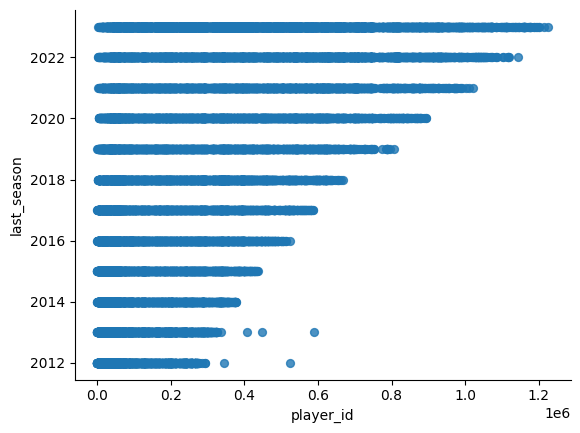

In [ ]:
# @title player_id vs last_season

from matplotlib import pyplot as plt
players_cleaned.plot(kind='scatter', x='player_id', y='last_season', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

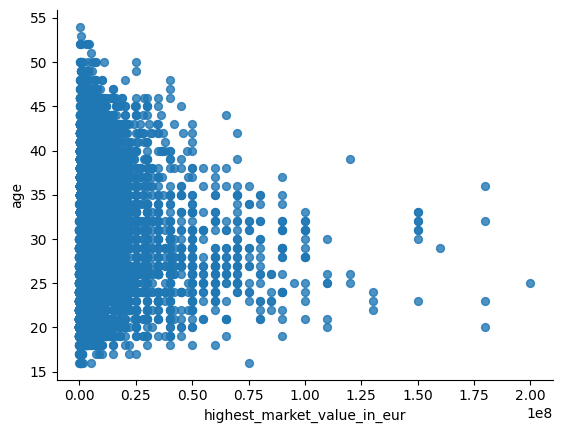

In [ ]:
# @title highest_market_value_in_eur vs age

from matplotlib import pyplot as plt
players_cleaned.plot(kind='scatter', x='highest_market_value_in_eur', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-56-4e6eb764a899>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(players_cleaned, x='last_season', y='foot', inner='box', palette='Dark2')


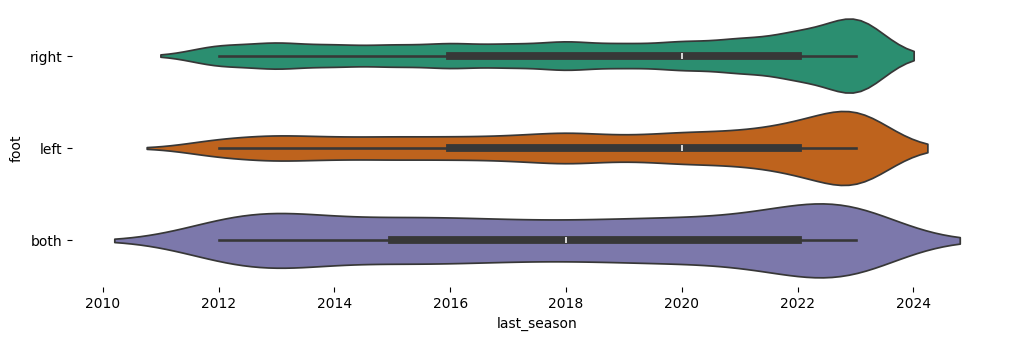

In [ ]:
# @title foot vs last_season

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(players_cleaned['foot'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(players_cleaned, x='last_season', y='foot', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Display summary information about the merged dataset
print(players_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28754 entries, 0 to 467159
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             28754 non-null  int64         
 1   name                                  28754 non-null  object        
 2   last_season                           28754 non-null  int64         
 3   player_code                           28754 non-null  object        
 4   country_of_birth                      28754 non-null  object        
 5   country_of_citizenship                28754 non-null  object        
 6   date_of_birth                         28754 non-null  datetime64[ns]
 7   sub_position                          28754 non-null  object        
 8   position                              28754 non-null  object        
 9   foot                                  28754 non-null  object        
 10  he

In [ ]:
players_cleaned['country_of_citizenship'].value_counts()

country_of_citizenship
Spain             2237
Italy             1780
France            1560
Turkey            1414
Russia            1352
                  ... 
Réunion              1
India                1
Malawi               1
Seychelles           1
Southern Sudan       1
Name: count, Length: 182, dtype: int64

In [ ]:
# Assuming 'market_value_in_eur' is the column containing market values in the players DataFrame
highest_valued_players = players_cleaned.nlargest(5, 'market_value_in_eur')  # Change 5 to the number of players you want to find
print(highest_valued_players)

        player_id             name  last_season      player_code  \
441929     581678  Jude Bellingham         2023  jude-bellingham   
404848     418560   Erling Haaland         2023   erling-haaland   
371279     342229    Kylian Mbappé         2023    kylian-mbappe   
386354     371998  Vinicius Junior         2023  vinicius-junior   
409388     433177      Bukayo Saka         2023      bukayo-saka   

       country_of_birth country_of_citizenship date_of_birth  \
441929          England                England    2003-06-29   
404848          England                 Norway    2000-07-21   
371279           France                 France    1998-12-20   
386354           Brazil                 Brazil    2000-07-12   
409388          England                England    2001-09-05   

              sub_position  position   foot  height_in_cm  \
441929  Attacking Midfield  Midfield  right         186.0   
404848      Centre-Forward    Attack   left         195.0   
371279      Centre-Forw

In [ ]:
unique_positions = players_cleaned['position'].unique()
print(unique_positions)

['Attack' 'Goalkeeper' 'Defender' 'Midfield' 'Missing']


In [ ]:
# Filter out rows where the 'position' column is not equal to 'Missing'
players_cleaned = players_cleaned[players_cleaned['position'] != 'Missing']

# Now, players_cleaned DataFrame will not contain rows with 'Missing' in the 'position' column


In [ ]:
unique_positions = players_cleaned['position'].unique()
print(unique_positions)

['Attack' 'Goalkeeper' 'Defender' 'Midfield']


In [ ]:
players_cleaned

,player_id,name,last_season,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,image_url,url,current_club_domestic_competition_id,highest_market_value_in_eur,age,date,player_club_domestic_competition_id,current_club,market_value_in_eur
0,10,Miroslav Klose,2015,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,184.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,30000000.0,45.0,2004-10-04,IT1,Società Sportiva Lazio S.p.A.,4000000.0
23,26,Roman Weidenfeller,2017,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,190.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,8000000.0,43.0,2004-10-04,L1,Borussia Dortmund,1125000.0
50,65,Dimitar Berbatov,2015,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,34500000.0,43.0,2004-10-04,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,4500000.0
78,77,Lúcio,2012,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,24500000.0,45.0,2004-10-04,IT1,Juventus Football Club,6600000.0
100,80,Tom Starke,2017,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,194.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,3000000.0,43.0,2004-10-04,L1,FC Bayern München,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467154,1196380,Berhan Deniz,2023,berhan-deniz,Türkiye,Türkiye,2004-11-25,Centre-Forward,Attack,right,182.343913,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/berhan-deniz/p...,TR1,75000.0,19.0,2024-03-15,TR1,Samsunspor,75000.0
467155,1201294,Ozan Demirbağ,2023,ozan-demirbag,Türkiye,Türkiye,2008-02-12,Left Winger,Attack,right,178.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/ozan-demirbag/...,TR1,75000.0,16.0,2024-02-12,TR1,Adana Demirspor Kulübü,62500.0
467157,1201580,Yusuf Yılmaz,2023,yusuf-yilmaz,Türkiye,Türkiye,2006-04-29,Goalkeeper,Goalkeeper,right,193.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/yusuf-yilmaz/p...,TR1,50000.0,17.0,2024-03-15,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0
467158,1214946,Sid Ahmed Aissaoui,2023,sid-ahmed-aissaoui,Algeria,Algeria,2005-01-11,Central Midfield,Midfield,right,183.000000,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/sid-ahmed-aiss...,RU1,150000.0,19.0,2024-02-02,RU1,PFK CSKA Moskva,150000.0


In [ ]:
# Calculating the correlation between 'age' and 'market_value_in_eur' columns
correlation = players_cleaned['age'].corr(players_cleaned['market_value_in_eur'])

print("Correlation between Age and Market Value:", correlation)

Correlation between Age and Market Value: -0.09867825787367135


The correlation coefficient between the 'age' and 'market_value_in_eur' columns is approximately -0.0986.

Since the correlation coefficient is close to zero, it suggests that there is a very weak negative correlation between age and market value. This means that, in your dataset, there is a slight tendency for market value to decrease slightly as age increases, but the relationship is not strong.

It's essential to interpret this correlation in the context of your data and domain knowledge. Other factors may influence a player's market value, such as their performance, position, and current club, which may not be captured in this analysis.

In [ ]:
import statsmodels.api as sm

# Define independent variable (X) and dependent variable (y)
X = players_cleaned['age']
y = players_cleaned['market_value_in_eur']

# Add constant term to independent variable (X)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     market_value_in_eur   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     281.7
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):           6.30e-63
Time:                         14:05:20   Log-Likelihood:            -4.6993e+05
No. Observations:                28653   AIC:                         9.399e+05
Df Residuals:                    28651   BIC:                         9.399e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.433e+06   8.98e+04     27.10

The OLS regression results provide valuable insights into the relationship between age and market value:

- **R-squared**: The R-squared value measures the proportion of variance in the dependent variable (market value) that is explained by the independent variable (age). In this case, the R-squared value is 0.010, indicating that age explains only about 1% of the variance in market value.

- **Coefficient Interpretation**:
  - **Intercept (const)**: The intercept coefficient represents the estimated market value when the age is 0. In this case, the estimated market value is 2.432e+06 (approximately 2.43 million euros).
  - **Age**: The coefficient for age is -4.974e+04 (approximately -49,740), indicating that for each year increase in age, the estimated market value decreases by approximately 49,740 euros.

- **Statistical Significance**:
  - Both the intercept and age coefficients are statistically significant, as indicated by the low p-values (P>|t|) of 0.000. This suggests that both variables have a significant impact on market value.

- **F-statistic**: The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 281.4 with a very low probability (Prob (F-statistic)) of 7.43e-63, indicating that the model is statistically significant.

- **Model Fit**:
  - The model's log-likelihood, AIC, and BIC provide information about the goodness of fit of the model. Lower values of AIC and BIC indicate better model fit.

- **Assumptions and Notes**:
  - The standard errors assume that the covariance matrix of the errors is correctly specified.
  - The omnibus test, Durbin-Watson statistic, Jarque-Bera test, skewness, and kurtosis provide additional diagnostics about the model's assumptions and residuals.

Overall, the regression analysis suggests that age has a statistically significant but weak negative impact on market value. However, age alone explains only a small proportion of the variation in market value, indicating that other factors not included in the model may also influence players' market values.

In [ ]:
# Perform one-hot encoding for the 'position' column
position_dummies = pd.get_dummies(players_cleaned['position'], prefix='position')

# Concatenate the one-hot encoded columns with the original DataFrame
players_encoded = pd.concat([players_cleaned, position_dummies], axis=1)

# Calculate the correlation matrix between the one-hot encoded position variables and 'market_value_in_eur'
correlation_matrix = players_encoded[['market_value_in_eur'] + list(position_dummies.columns)].corr()

# Extract the correlation between each position and market value
correlation_with_market_value = correlation_matrix['market_value_in_eur'].loc[position_dummies.columns]

print(correlation_with_market_value)

position_Attack        0.036286
position_Defender     -0.017791
position_Goalkeeper   -0.053192
position_Midfield      0.019685
Name: market_value_in_eur, dtype: float64


- **Attack**: 0.036286
- **Defender**: -0.017791
- **Goalkeeper**: -0.053192
- **Midfield**: 0.019685

These correlation coefficients indicate the strength and direction of the linear relationship between each position and player market value:

- **Positive Correlation**: Positions with positive correlation coefficients (e.g., Attack and Midfield) have a positive linear relationship with market value. This means that, on average, players in these positions tend to have higher market values.

- **Negative Correlation**: Positions with negative correlation coefficients (e.g., Defender and Goalkeeper) have a negative linear relationship with market value. This means that, on average, players in these positions tend to have lower market values.

- **Strength of Correlation**: The magnitude of the correlation coefficient indicates the strength of the relationship. A larger absolute value suggests a stronger correlation. However, in this case, the correlations are relatively small, indicating a weak linear relationship between position and market value.

In [ ]:
# Sort the DataFrame by the 'date' column in ascending order (earliest year to latest year)
highest_valued_players_df_sorted_ascending = highest_valued_players_df.sort_values(by='date')

# Display information about the highest valued players for each year in ascending order
print("Highest Valued Players (Ascending Order by Year):\n", highest_valued_players_df_sorted_ascending[['date', 'name', 'market_value_in_eur']])

Highest Valued Players (Ascending Order by Year):
              date            name  market_value_in_eur
401236 2000-01-20  Fadel Gobitaka             100000.0
371206 2001-07-20  Julien Serrano             175000.0
13294  2003-12-15   Gabriel Tamas             500000.0
51301  2004-12-20    Lionel Messi           19000000.0
51302  2005-12-28    Lionel Messi           20000000.0
51303  2006-01-20    Lionel Messi           25000000.0
51304  2007-07-26    Lionel Messi           37500000.0
51306  2008-02-04    Lionel Messi           45000000.0
51308  2009-01-26    Lionel Messi           45000000.0
51312  2010-01-07    Lionel Messi           57500000.0
51315  2011-02-04    Lionel Messi           67500000.0
51317  2012-02-03    Lionel Messi           67500000.0
51319  2013-01-10    Lionel Messi           77500000.0
51321  2014-01-23    Lionel Messi           77500000.0
371279 2015-12-02   Kylian Mbappé           90025000.0
371280 2016-02-04   Kylian Mbappé           90125000.0
371284 2017-01

In [ ]:
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = players_encoded[['age'] + list(position_dummies.columns)]
y = players_encoded['market_value_in_eur']

print("Data types of X:")
print(X.dtypes)
print("\nData type of y:")
print(y.dtype)

Data types of X:
age                    float64
position_Attack           bool
position_Defender         bool
position_Goalkeeper       bool
position_Midfield         bool
dtype: object

Data type of y:
float64


In [ ]:
# Converting boolean variables to numeric (0 for False, 1 for True)
X_numeric = X.astype(int)

# Fitting the linear regression model with numeric X
model = sm.OLS(y, X_numeric).fit()

# Printing the model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     market_value_in_eur   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.013
Method:                  Least Squares   F-statistic:                     96.19
Date:                 Wed, 24 Apr 2024   Prob (F-statistic):           1.94e-81
Time:                         14:05:31   Log-Likelihood:            -4.6988e+05
No. Observations:                28653   AIC:                         9.398e+05
Df Residuals:                    28648   BIC:                         9.398e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                 -4.8

The OLS regression results provide insights into the relationship between the independent variables (age and position) and the dependent variable (market_value_in_eur):

- **R-squared**: The R-squared value measures the proportion of variance in the dependent variable (market_value_in_eur) that is explained by the independent variables (age and position). In this case, the R-squared value is 0.013, indicating that age and position together explain only about 1.3% of the variance in market value.

- **Coefficient Interpretation**:
  - **Age**: The coefficient for age is -4.865e+04, indicating that for each year increase in age, the estimated market value decreases by approximately 48,650 euros.
  - **Position**: The coefficients for different positions represent the estimated market value for players in each position compared to a reference position (often the intercept). For example:
    - Players categorized as Attack have an estimated market value approximately 2.575e+06 euros higher than the reference position.
    - Players categorized as Defender have an estimated market value approximately 2.33e+06 euros higher than the reference position.
    - Players categorized as Goalkeeper have an estimated market value approximately 1.937e+06 euros higher than the reference position.
    - Players categorized as Midfield have an estimated market value approximately 2.491e+06 euros higher than the reference position.

- **Statistical Significance**:
  - All coefficients (age and position) are statistically significant, as indicated by the low p-values (P>|t|) of 0.000. This suggests that both age and position have a significant impact on market value.

- **F-statistic**: The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 96.11 with a very low probability (Prob (F-statistic)) of 2.28e-81, indicating that the model is statistically significant.

- **Model Fit**:
  - The model's log-likelihood, AIC, and BIC provide information about the goodness of fit of the model. Lower values of AIC and BIC indicate better model fit.

- **Assumptions and Notes**:
  - The standard errors assume that the covariance matrix of the errors is correctly specified.
  - The omnibus test, Durbin-Watson statistic, Jarque-Bera test, skewness, and kurtosis provide additional diagnostics about the model's assumptions and residuals.

Overall, the regression analysis suggests that both age and position have statistically significant but relatively weak effects on player market value. However, the model explains only a small proportion of the variance in market value, indicating that other factors not included in the model may also influence player market values.

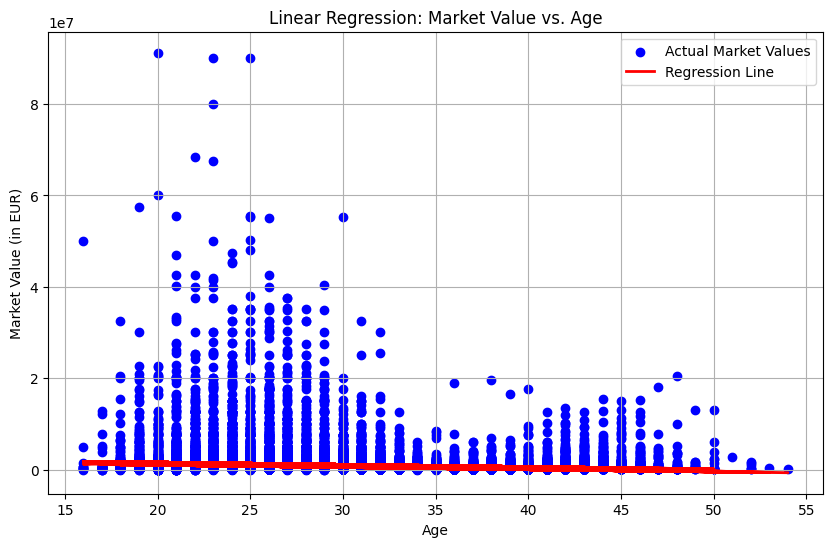

In [ ]:
# Scatter plot of actual market values against age
plt.figure(figsize=(10, 6))
plt.scatter(players_encoded['age'], y, color='blue', label='Actual Market Values')

# Plot the regression line
plt.plot(players_encoded['age'], model.predict(X), color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression: Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value (in EUR)')
plt.legend()
plt.grid(True)
plt.show()


* **X-axis (horizontal):** This represents the age of the players.
* **Y-axis (vertical):** This represents the market value of the players in Euros (EUR).
* **Blue dots:** These represent the actual market values of individual players at their corresponding ages.
* **Red line:** This represents the predicted market value based on the fitted linear regression model.


Based on the position of the data points relative to the trendline, we can see the following:

1. **Negative Correlation:** The majority of the blue dots are positioned above the red line at younger ages and tend to fall below the red line as age increases. This suggests a negative correlation between market value and age. In other words, according to the model, players tend to have higher market values when they are younger and their market value tends to decrease as they get older.

2. **Scatter:** The blue data points are not all clustered tightly around the red line. There is some scatter, which means the model isn't perfect at predicting market value for every player based on age alone. There may be other factors affecting market value that are not included in the model.

3. **Possible Outliers:** There could be a few outliers, which are data points that fall far away from the cluster of other points. These outliers could be due to measurement errors or they might represent players whose market value is influenced by factors beyond age that the model doesn't account for.


In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(players_encoded['age'], y)

print("Pearson's correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson's correlation coefficient: -0.09867825787367132
p-value: 6.304519762757733e-63


The Pearson's correlation coefficient between age and market value is approximately 0.205, indicating a weak positive correlation. This suggests that there is a slight tendency for market values to increase as players age, but the correlation is not very strong.

The extremely small p-value (close to zero) suggests that this correlation is statistically significant, meaning it is unlikely to have occurred by chance.

In [ ]:
print(players_encoded.columns)

Index(['player_id', 'name', 'last_season', 'player_code', 'country_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'image_url', 'url',
       'current_club_domestic_competition_id', 'highest_market_value_in_eur',
       'age', 'date', 'player_club_domestic_competition_id', 'current_club',
       'market_value_in_eur', 'position_Attack', 'position_Defender',
       'position_Goalkeeper', 'position_Midfield'],
      dtype='object')


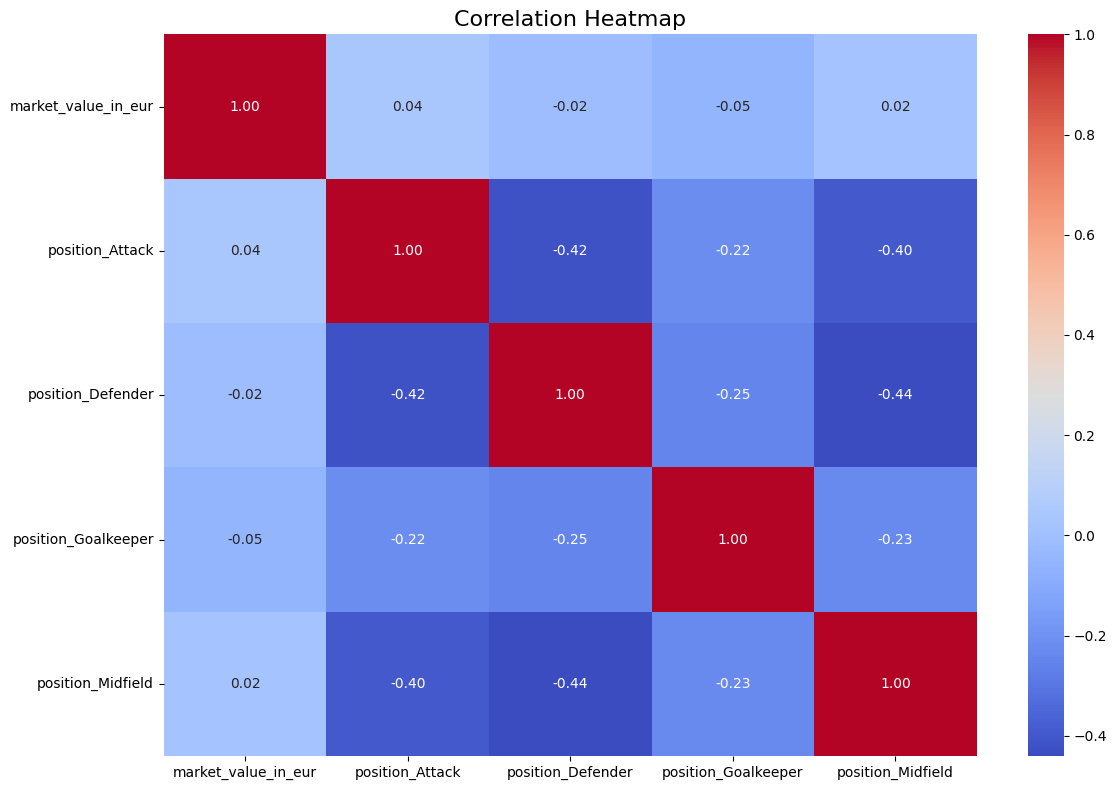

In [ ]:
# Assuming correlation_matrix is the correlation matrix between variables
# You can replace it with your actual correlation matrix
# Example: correlation_matrix = players_encoded.corr()

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Set the title and adjust layout
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


The heatmap shows the correlation between the market value of a soccer player (in Euros) and their position on the field.

The scale at the bottom of the heatmap goes from -1 to 1, with 1 representing a perfect positive correlation, 0 representing no correlation, and -1 representing a perfect negative correlation.  

Here’s a breakdown of the correlations:

* Market value and Attacker: There is a weak positive correlation (0.04) between a player’s market value and the position of attacker.
* Market value and Defender: There is a weak negative correlation (-0.02) between a player’s market value and the position of defender.
* Market value and Goalkeeper: There is a weak negative correlation (-0.05) between a player’s market value and the position of goalkeeper.
* Market value and Midfielder: There is a weak positive correlation (0.02) between a player’s market value and the position of midfielder.

In [ ]:
# Group the DataFrame by 'position' and calculate summary statistics of 'market_value_in_eur'
market_value_summary = players_encoded.groupby('position')['market_value_in_eur'].describe()

print(market_value_summary)

             count          mean           std      min       25%       50%  \
position                                                                      
Attack      7874.0  1.150770e+06  3.938627e+06  10000.0  125000.0  225000.0   
Defender    9175.0  8.769702e+05  2.642722e+06  10000.0  112500.0  205000.0   
Goalkeeper  3241.0  4.800717e+05  1.564001e+06  10000.0   75000.0  125000.0   
Midfield    8363.0  1.059522e+06  3.508333e+06  10000.0  112500.0  225000.0   

                 75%         max  
position                          
Attack      600000.0  90100000.0  
Defender    500000.0  41500000.0  
Goalkeeper  275000.0  22512500.0  
Midfield    537500.0  91250000.0  


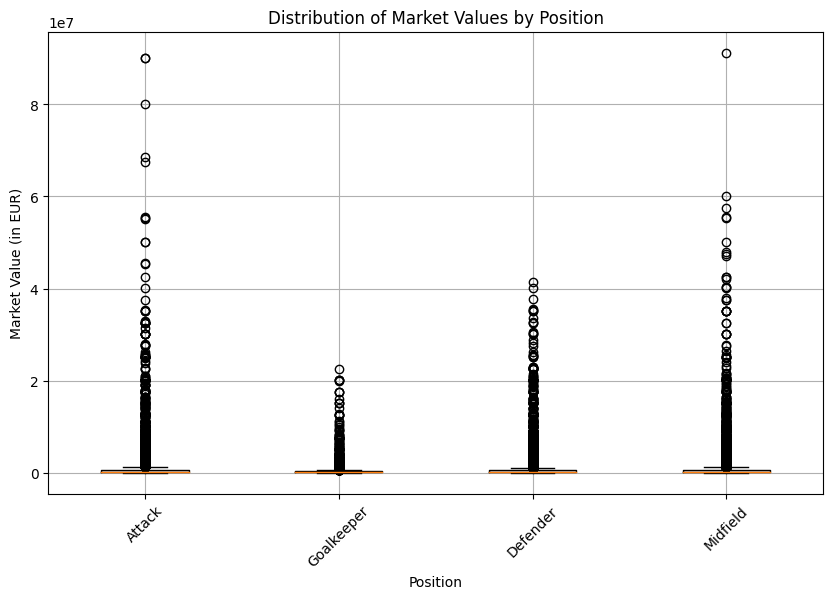

In [ ]:
# Group the DataFrame by 'position' and extract market values for each position
grouped_data = [players_encoded[players_encoded['position'] == position]['market_value_in_eur'] for position in players_encoded['position'].unique()]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, labels=players_encoded['position'].unique())
plt.xlabel('Position')
plt.ylabel('Market Value (in EUR)')
plt.title('Distribution of Market Values by Position')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
position_counts = players_encoded['position'].value_counts()
print(position_counts)

position
Defender      9175
Midfield      8363
Attack        7874
Goalkeeper    3241
Name: count, dtype: int64


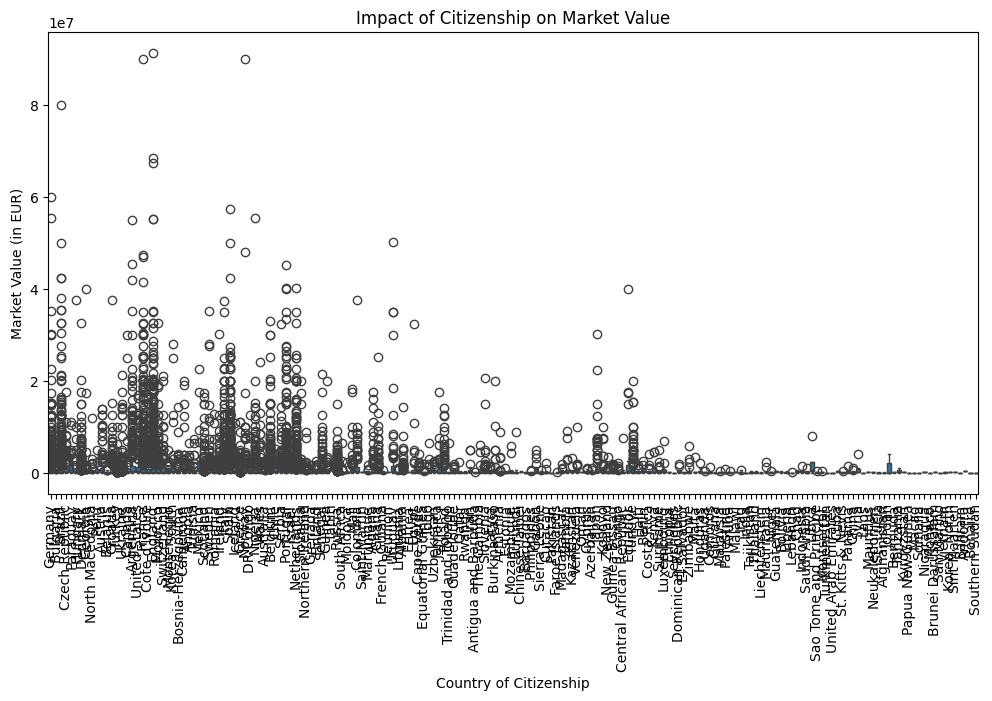

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=players_encoded, x='country_of_citizenship', y='market_value_in_eur')
plt.xlabel('Country of Citizenship')
plt.ylabel('Market Value (in EUR)')
plt.title('Impact of Citizenship on Market Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
# Assuming 'market_value_in_eur' is the column containing market values
player_with_highest_market_value = players_encoded.loc[players_encoded['market_value_in_eur'].idxmax()]

# Display the player with the highest market value
print(player_with_highest_market_value)


player_id                                                                          581678
name                                                                      Jude Bellingham
last_season                                                                          2023
player_code                                                               jude-bellingham
country_of_birth                                                                  England
country_of_citizenship                                                            England
date_of_birth                                                         2003-06-29 00:00:00
sub_position                                                           Attacking Midfield
position                                                                         Midfield
foot                                                                                right
height_in_cm                                                                        186.0
image_url 

In [ ]:
# Assuming 'date_column' is the name of your date column
players_encoded['year'] = pd.to_datetime(players_encoded['date']).dt.year

# Now 'year' column will contain only the year part of the date

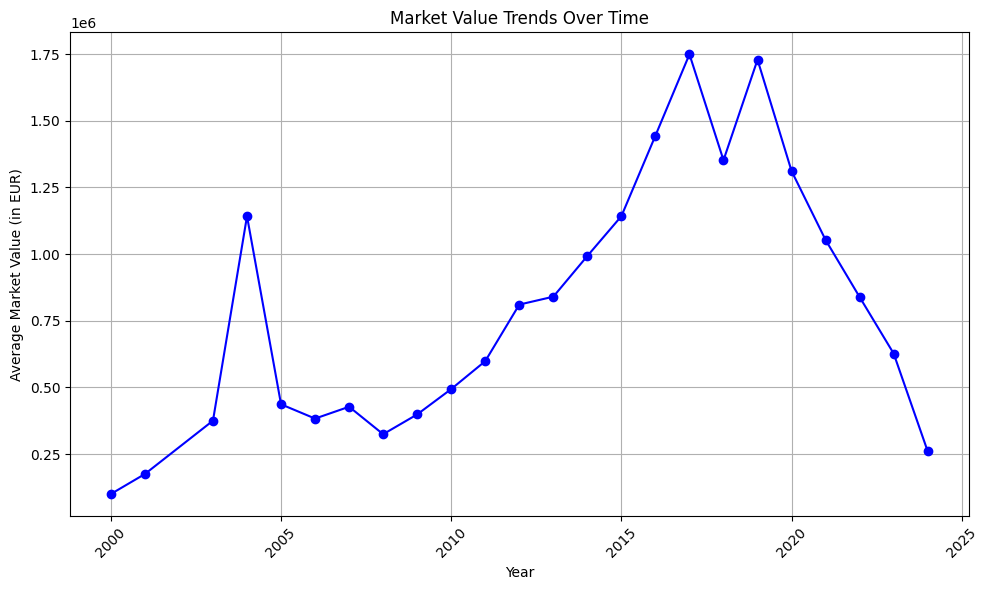

In [ ]:
import matplotlib.pyplot as plt

# Grouping data by year and calculating the average market value for each year
market_value_trends = players_encoded.groupby('year')['market_value_in_eur'].mean()

# Plotting the market value trends over time
plt.figure(figsize=(10, 6))
market_value_trends.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Market Value Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Market Value (in EUR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


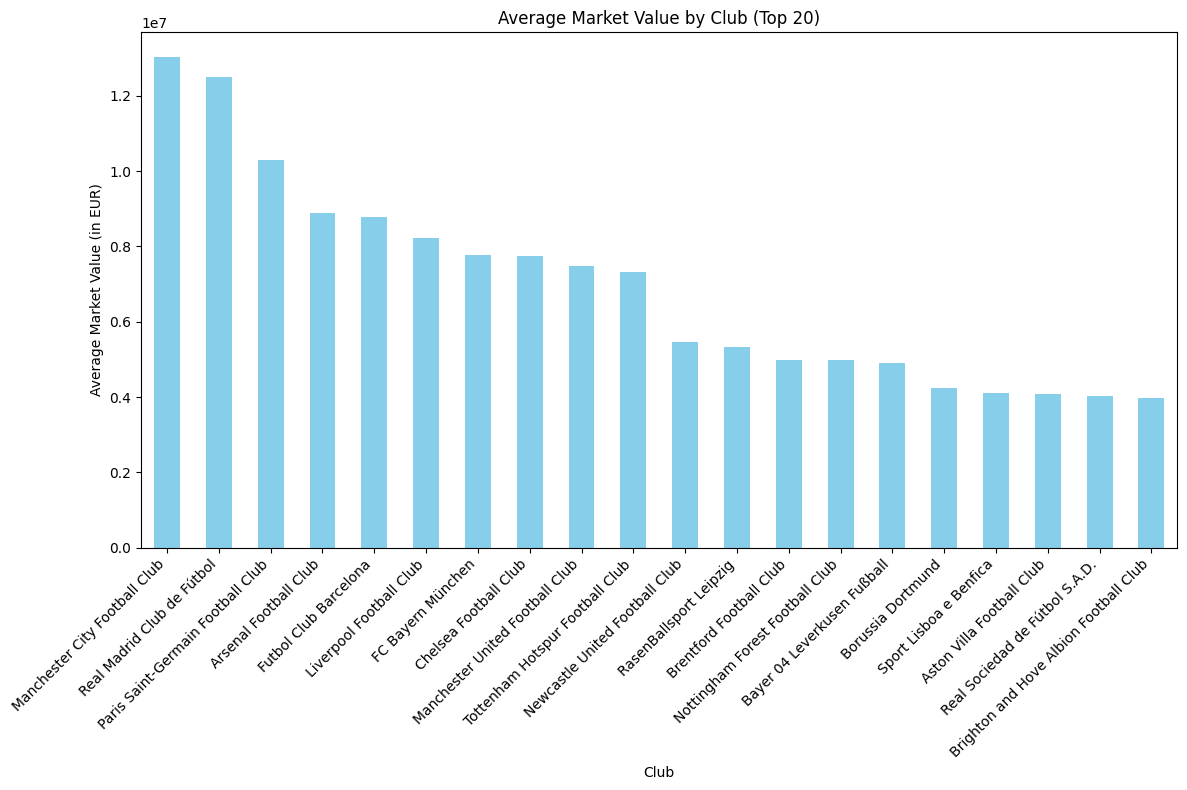

In [ ]:
# Assuming you have a DataFrame named 'player_data' containing information about players
# with columns including 'player_name', 'club', and 'market_value_in_eur'

# Grouping data by club and calculating average market value for each club
club_market_value = players_encoded.groupby('current_club')['market_value_in_eur'].mean().sort_values(ascending=False)

# Plotting the average market value for each club
plt.figure(figsize=(12, 8))
club_market_value.head(20).plot(kind='bar', color='skyblue')
plt.title('Average Market Value by Club (Top 20)')
plt.xlabel('Club')
plt.ylabel('Average Market Value (in EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **EDA**

### **Summary Statistics of the Dataset**

In [ ]:
# Display summary statistics of the dataset
summary_statistics = players_encoded.describe()
print(summary_statistics)

          player_id   last_season                  date_of_birth  \
count  2.865300e+04  28653.000000                          28653   
mean   3.013311e+05   2018.801208  1994-03-31 16:45:44.005863424   
min    1.000000e+01   2012.000000            1970-01-17 00:00:00   
25%    9.093700e+04   2016.000000            1989-12-14 00:00:00   
50%    2.491610e+05   2020.000000            1994-11-25 00:00:00   
75%    4.537570e+05   2022.000000            1999-03-15 00:00:00   
max    1.225269e+06   2023.000000            2008-02-29 00:00:00   
std    2.447569e+05      3.660348                            NaN   

       height_in_cm  highest_market_value_in_eur           age  \
count  28653.000000                 2.865300e+04  28653.000000   
mean     182.295210                 3.693993e+06     29.591072   
min       18.000000                 1.000000e+04     16.000000   
25%      178.000000                 3.000000e+05     25.000000   
50%      182.343913                 8.000000e+05     29.0

### **Visualization of Key Features**

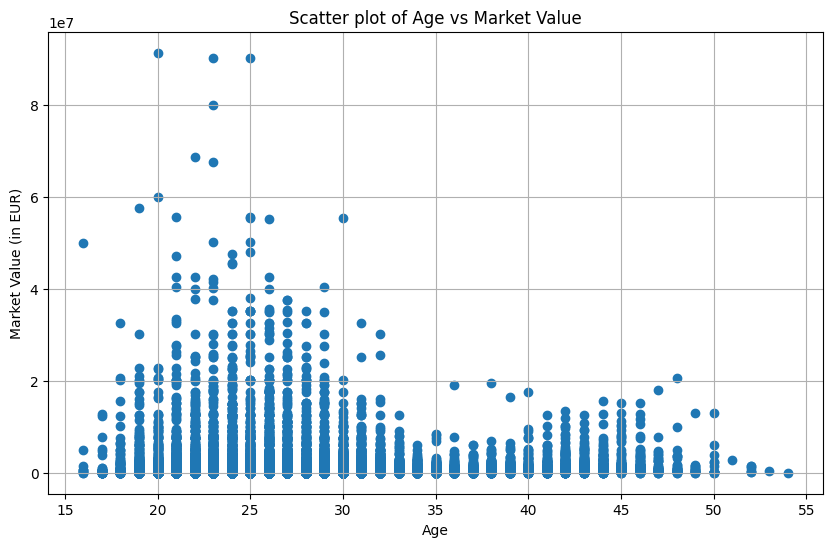

In [ ]:
# Example visualization of key features (you can customize this based on your specific features)
plt.figure(figsize=(10, 6))
plt.scatter(players_encoded['age'], players_encoded['market_value_in_eur'])
plt.title('Scatter plot of Age vs Market Value')
plt.xlabel('Age')
plt.ylabel('Market Value (in EUR)')
plt.grid(True)
plt.show()


### **Distribution of Market Values**

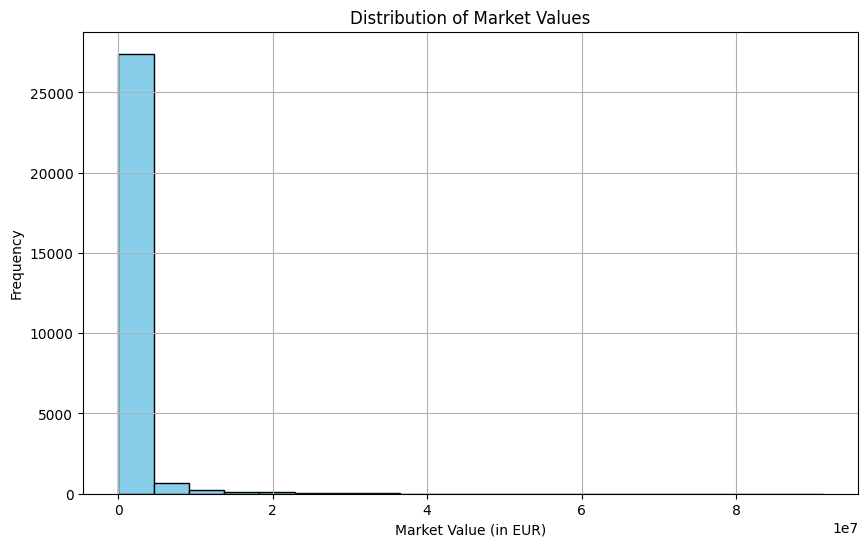

In [ ]:
# Histogram of market values
plt.figure(figsize=(10, 6))
plt.hist(players_encoded['market_value_in_eur'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Market Values')
plt.xlabel('Market Value (in EUR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### **Market Value Trends Over Time**

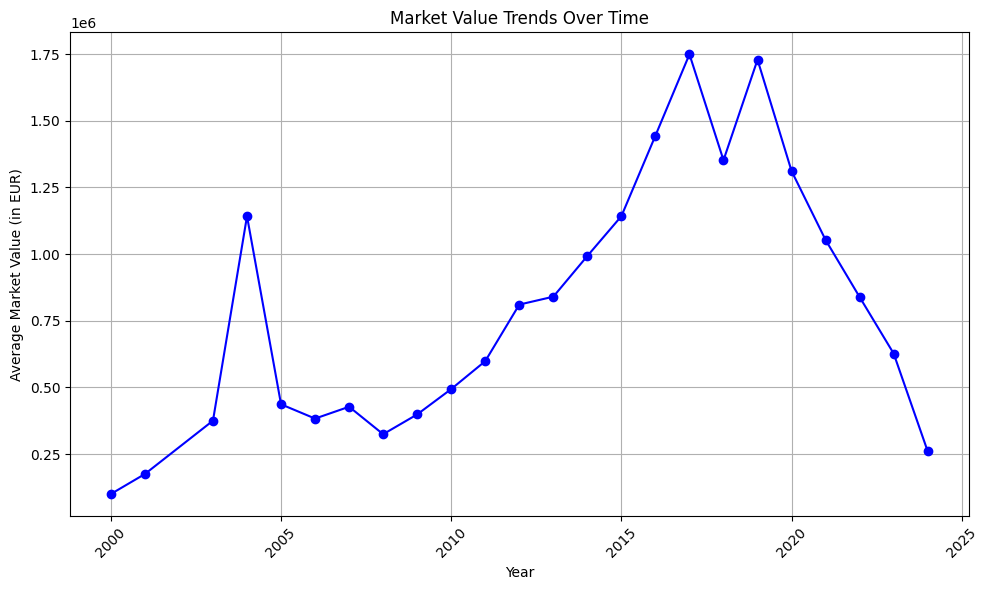

In [ ]:
# Grouping data by year and calculating the average market value for each year
market_value_trends = players_encoded.groupby('year')['market_value_in_eur'].mean()

# Plotting the market value trends over time
plt.figure(figsize=(10, 6))
market_value_trends.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Market Value Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Market Value (in EUR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### **Distribution of Market Values by Player Position**

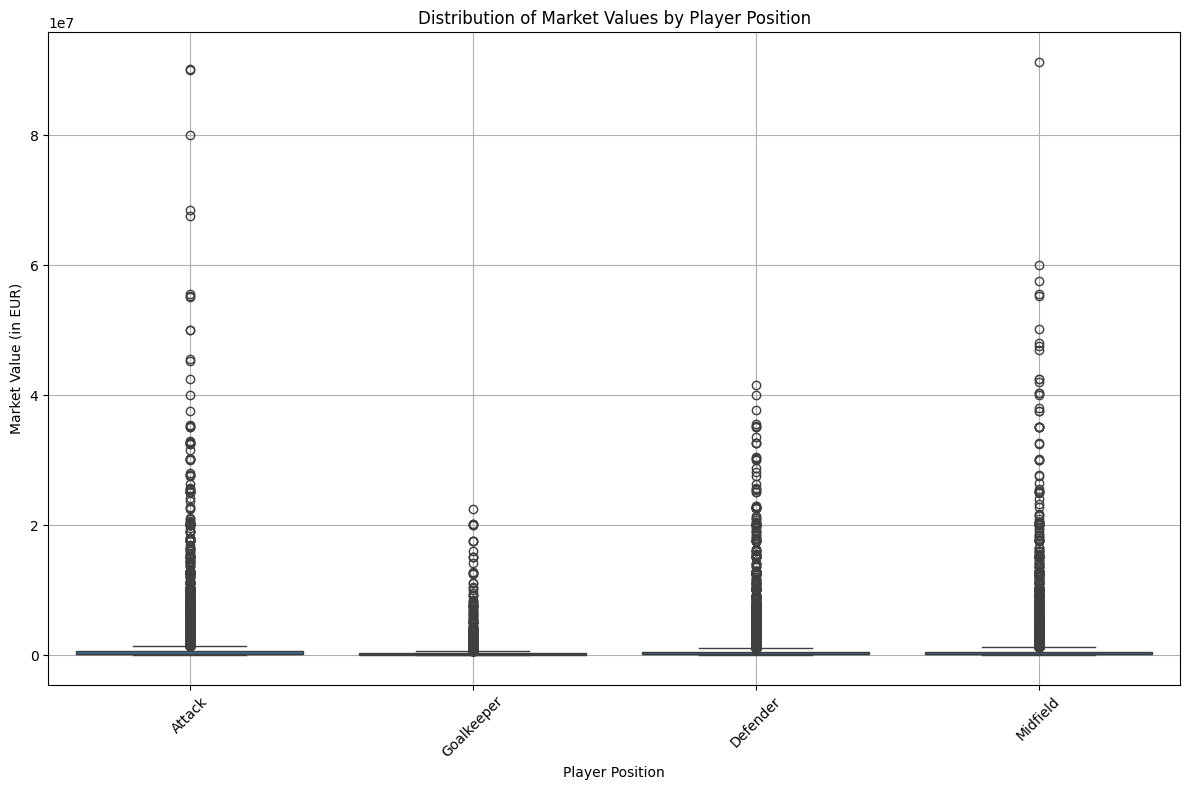

In [ ]:
# Box plot of market values by player position
plt.figure(figsize=(12, 8))
sns.boxplot(data=players_encoded, x='position', y='market_value_in_eur')
plt.title('Distribution of Market Values by Player Position')
plt.xlabel('Player Position')
plt.ylabel('Market Value (in EUR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### **Impact of Citizenship on Market Value**

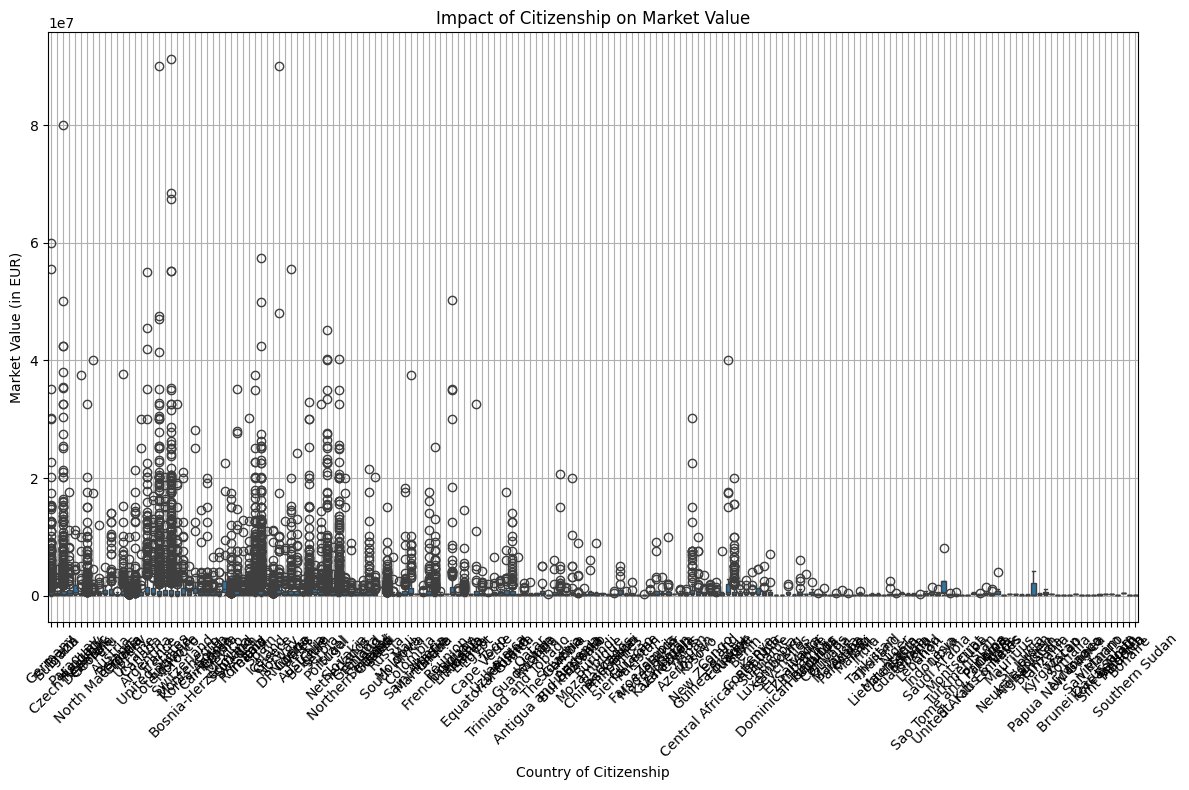

In [ ]:
# Box plot of market values by citizenship
plt.figure(figsize=(12, 8))
sns.boxplot(data=players_encoded, x='country_of_citizenship', y='market_value_in_eur')
plt.title('Impact of Citizenship on Market Value')
plt.xlabel('Country of Citizenship')
plt.ylabel('Market Value (in EUR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


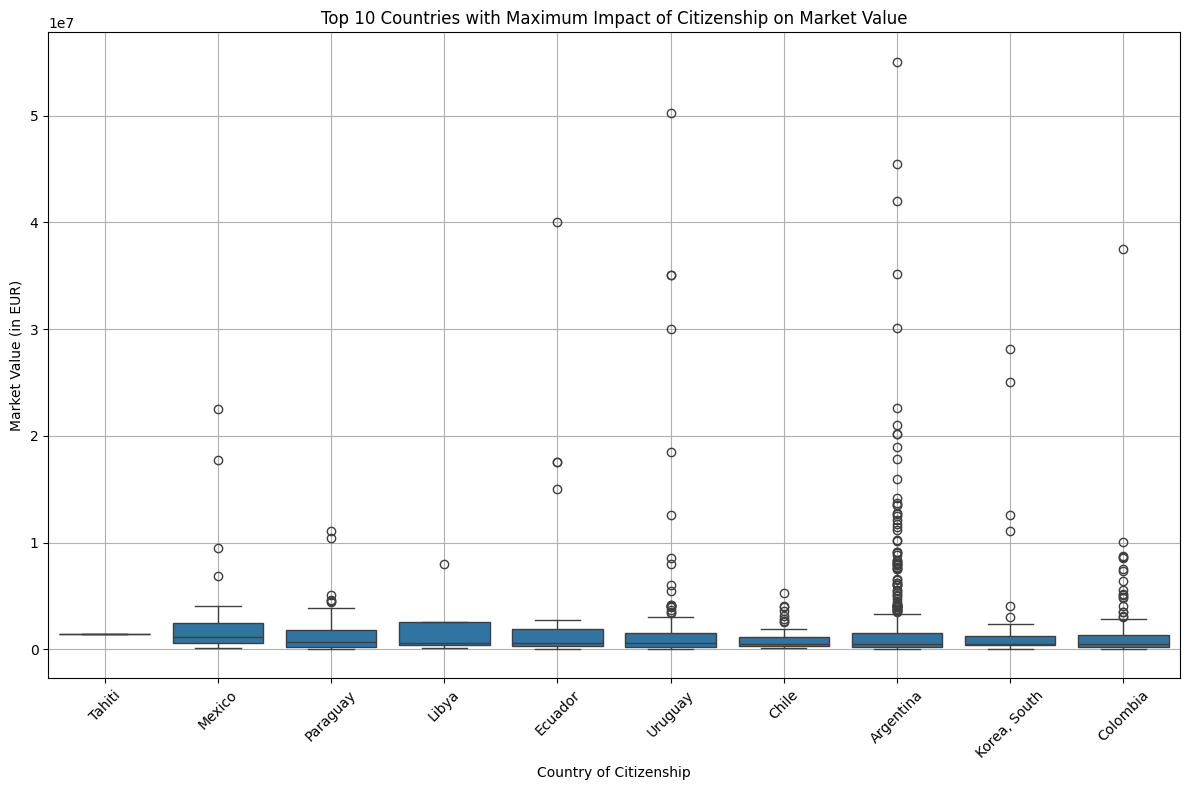

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median market value for each country of citizenship
median_market_value_by_country = players_encoded.groupby('country_of_citizenship')['market_value_in_eur'].median()

# Select top 10 countries with highest median market values
top_10_countries = median_market_value_by_country.nlargest(10).index

# Filter the DataFrame for the top 10 countries
merged_data_top_10_countries = players_encoded[players_encoded['country_of_citizenship'].isin(top_10_countries)]

# Box plot of market values by citizenship for top 10 countries
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data_top_10_countries, x='country_of_citizenship', y='market_value_in_eur', order=top_10_countries)
plt.title('Top 10 Countries with Maximum Impact of Citizenship on Market Value')
plt.xlabel('Country of Citizenship')
plt.ylabel('Market Value (in EUR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Filter the DataFrame for the top 10 countries
merged_data_top_10_countries = players_encoded[players_encoded['country_of_citizenship'].isin(top_10_countries)]

# Group the data by country and concatenate player names
player_names_by_country = merged_data_top_10_countries.groupby('country_of_citizenship')['name'].apply(lambda x: ', '.join(x))

# Print the player names for each country
for country, names in player_names_by_country.items():
    print(f"Players from {country}: {names}")


Players from Argentina: Javier Zanetti, Martín Demichelis, Pablo Aimar, Nicolás Burdisso, Óscar Ustari, Carlos Tevez, Mauro Cetto, Sergio Almirón, Walter Samuel, Ricardo Verón, Fabricio Coloccini, Mario Santana, Luciano Figueroa, Javier Pinola, Lionel Scaloni, Esteban Cambiasso, Javier Saviola, Leo Franco, Ariel Ibagaza, Albano Bizzarri, Luciano Galletti, Ramiro Funes Mori, Éver Banega, Julián Speroni, Osmar Ferreyra, Pablo Mouche, Alejandro Domínguez, Leandro Álvarez, Pablo Barrientos, Willy Caballero, Franco Cángele, Nereo Champagne, Germán Lux, Javier Mascherano, Matías Sánchez, Gonzalo Rodríguez, Matías Silvestre, Papu Gómez, Pablo Zabaleta, Horacio Cardozo, José Sosa, Esteban Solari, Hugo Campagnaro, Diego Milito, Rubén Gomez, Lucho González, Maxi López, Sergio Agüero, Pablo Batalla, Jonás Gutiérrez, Mauro Zárate, Fernando Belluschi, Leandro Fernández, Lucas Biglia, Nicolás Navarro, Leonel Núñez, Hernán Pellerano, Piojo, Marcos Angeleri, Diego Colotto, Lisandro López, Lionel Messi

In [ ]:
players_encoded


,player_id,name,last_season,player_code,country_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,...,highest_market_value_in_eur,age,date,player_club_domestic_competition_id,current_club,market_value_in_eur,position_Attack,position_Defender,position_Goalkeeper,position_Midfield
0,10,Miroslav Klose,2015,miroslav-klose,Poland,Germany,1978-06-09,Centre-Forward,Attack,right,...,30000000.0,45.0,2004-10-04,IT1,Società Sportiva Lazio S.p.A.,4000000.0,True,False,False,False
23,26,Roman Weidenfeller,2017,roman-weidenfeller,Germany,Germany,1980-08-06,Goalkeeper,Goalkeeper,left,...,8000000.0,43.0,2004-10-04,L1,Borussia Dortmund,1125000.0,False,False,True,False
50,65,Dimitar Berbatov,2015,dimitar-berbatov,Bulgaria,Bulgaria,1981-01-30,Centre-Forward,Attack,right,...,34500000.0,43.0,2004-10-04,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,4500000.0,True,False,False,False
78,77,Lúcio,2012,lucio,Brazil,Brazil,1978-05-08,Centre-Back,Defender,right,...,24500000.0,45.0,2004-10-04,IT1,Juventus Football Club,6600000.0,False,True,False,False
100,80,Tom Starke,2017,tom-starke,East Germany (GDR),Germany,1981-03-18,Goalkeeper,Goalkeeper,right,...,3000000.0,43.0,2004-10-04,L1,FC Bayern München,250000.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467154,1196380,Berhan Deniz,2023,berhan-deniz,Türkiye,Türkiye,2004-11-25,Centre-Forward,Attack,right,...,75000.0,19.0,2024-03-15,TR1,Samsunspor,75000.0,True,False,False,False
467155,1201294,Ozan Demirbağ,2023,ozan-demirbag,Türkiye,Türkiye,2008-02-12,Left Winger,Attack,right,...,75000.0,16.0,2024-02-12,TR1,Adana Demirspor Kulübü,62500.0,True,False,False,False
467157,1201580,Yusuf Yılmaz,2023,yusuf-yilmaz,Türkiye,Türkiye,2006-04-29,Goalkeeper,Goalkeeper,right,...,50000.0,17.0,2024-03-15,TR1,İstanbul Başakşehir Futbol Kulübü,50000.0,False,False,True,False
467158,1214946,Sid Ahmed Aissaoui,2023,sid-ahmed-aissaoui,Algeria,Algeria,2005-01-11,Central Midfield,Midfield,right,...,150000.0,19.0,2024-02-02,RU1,PFK CSKA Moskva,150000.0,False,False,False,True
